# Link: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data

In [42]:
import sklearn
print(sklearn.__version__)

1.6.1


In [43]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib as plt
import plotly.express as px

In [44]:
df = pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## Cambiar nombres de las columnas
#### Quitar los espacios antes de los nombres

In [45]:
print("Columnas original")
print(df.columns.tolist())
df.columns = df.columns.str.strip()
print("Columnas sin espacios antes de los nombres")
print(df.columns.tolist())
df['education'] = df['education'].str.lstrip()
df['self_employed'] = df['self_employed'].str.lstrip()
df['loan_status'] = df['loan_status'].str.lstrip()
    

Columnas original
['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']
Columnas sin espacios antes de los nombres
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [46]:
df = df.rename(columns={
    "loan_id": "ID",
    "no_of_dependents": "N_Dependientes",
    "education":"Educación",
    "self_employed": "Trabajador_Autonomo",
    "income_annum": "Ingresos_Anuales",
    "loan_amount" : "Valor_Préstamo",
    "loan_term" : "Plazo_Préstamo",
    "cibil_score" : "Pontuación_Crédito",
    "residential_assets_value": "Valor_Activos_Residenciales",
    "commercial_assets_value" :"Valor_Activos_Comerciales",
    "luxury_assets_value": "Valor_Activos_Lujo",
    "bank_asset_value": "Valor_Activo_Bancário",
    "loan_status" : "Status_Préstamo" })

In [47]:
df

,ID,N_Dependientes,Educación,Trabajador_Autonomo,Ingresos_Anuales,Valor_Préstamo,Plazo_Préstamo,Pontuación_Crédito,Valor_Activos_Residenciales,Valor_Activos_Comerciales,Valor_Activos_Lujo,Valor_Activo_Bancário,Status_Préstamo
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


### Comprobar valores nulos

In [48]:
df.isnull().sum()

ID                             0
N_Dependientes                 0
Educación                      0
Trabajador_Autonomo            0
Ingresos_Anuales               0
Valor_Préstamo                 0
Plazo_Préstamo                 0
Pontuación_Crédito             0
Valor_Activos_Residenciales    0
Valor_Activos_Comerciales      0
Valor_Activos_Lujo             0
Valor_Activo_Bancário          0
Status_Préstamo                0
dtype: int64

### Cantidad de Préstamos Aprobados

In [49]:
df["Status_Préstamo"].value_counts().sort_index()

Status_Préstamo
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [50]:
df.describe()

,ID,N_Dependientes,Ingresos_Anuales,Valor_Préstamo,Plazo_Préstamo,Pontuación_Crédito,Valor_Activos_Residenciales,Valor_Activos_Comerciales,Valor_Activos_Lujo,Valor_Activo_Bancário
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [51]:
df["N_Dependientes"].value_counts().sort_index()

N_Dependientes
0    712
1    697
2    708
3    727
4    752
5    673
Name: count, dtype: int64

In [52]:
df["Ingresos_Anuales"].value_counts()

Ingresos_Anuales
7000000    62
4100000    59
7600000    57
4700000    56
5300000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64

# Histogramas 

<Axes: xlabel='N_Dependientes', ylabel='Count'>

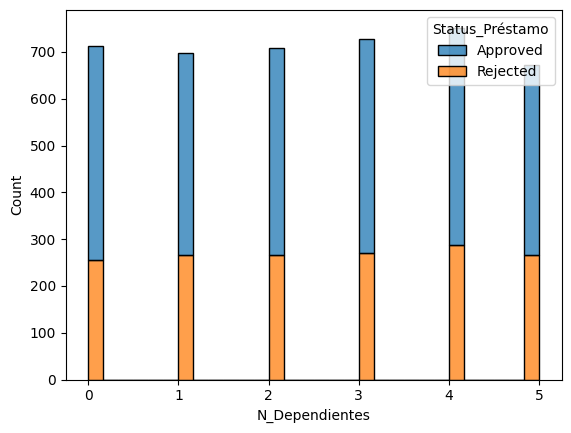

In [58]:
sns.histplot(
    data=df,
    x='N_Dependientes',
    hue='Status_Préstamo',    
    multiple='stack',         
    bins=30,
    kde=False
)

<Axes: xlabel='Ingresos_Anuales', ylabel='Count'>

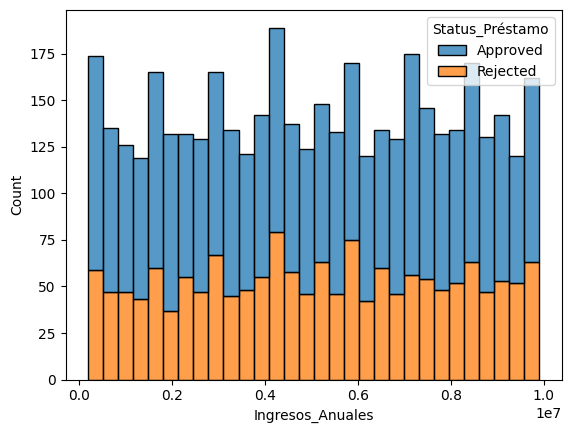

In [59]:
sns.histplot(
    data=df,
    x='Ingresos_Anuales',
    hue='Status_Préstamo',    
    multiple='stack',         
    bins=30,
    kde=False
)

<Axes: xlabel='Valor_Préstamo', ylabel='Count'>

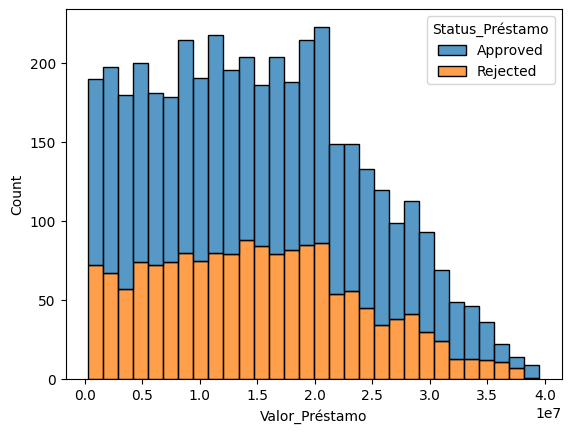

In [60]:
sns.histplot(
    data=df,
    x='Valor_Préstamo',
    hue='Status_Préstamo',    
    multiple='stack',         
    bins=30,
    kde=False
)

## Columna con mayor peso

<Axes: xlabel='Pontuación_Crédito', ylabel='Count'>

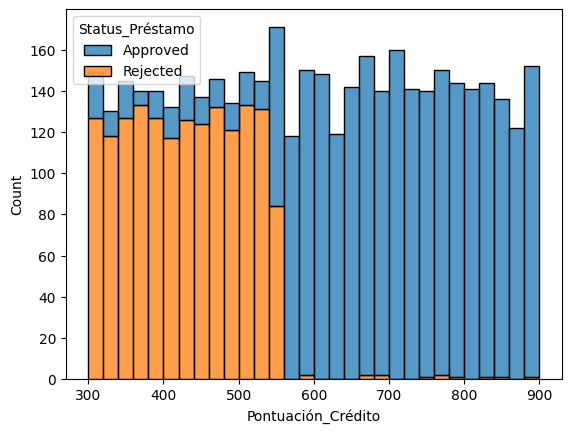

In [61]:
sns.histplot(
    data=df,
    x='Pontuación_Crédito',
    hue='Status_Préstamo',    
    multiple='stack',         
    bins=30,
    kde=False
)

<Axes: xlabel='Valor_Activos_Residenciales', ylabel='Count'>

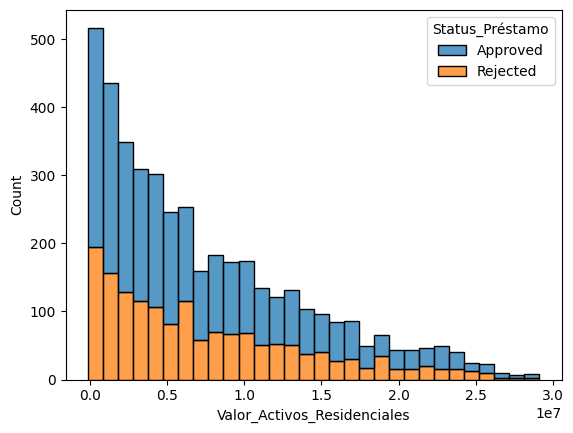

In [62]:
sns.histplot(
    data=df,
    x='Valor_Activos_Residenciales',
    hue='Status_Préstamo',    
    multiple='stack',         
    bins=30,
    kde=False
)

<Axes: xlabel='Valor_Activos_Comerciales', ylabel='Count'>

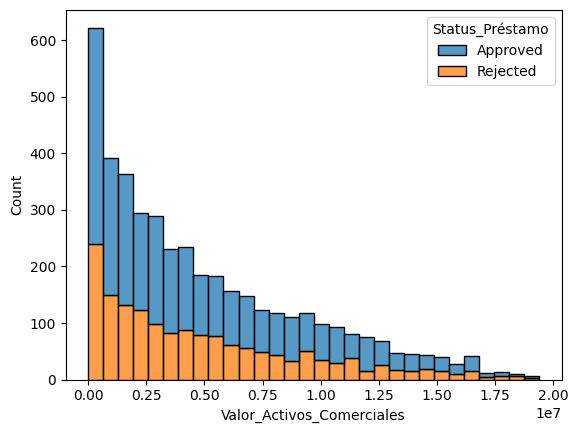

In [63]:
sns.histplot(
    data=df,
    x='Valor_Activos_Comerciales',
    hue='Status_Préstamo',    
    multiple='stack',         
    bins=30,
    kde=False
)

<Axes: xlabel='Valor_Activos_Lujo', ylabel='Count'>

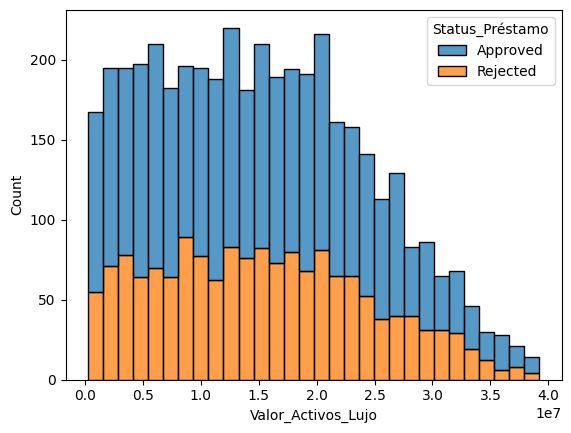

In [64]:
sns.histplot(
    data=df,
    x='Valor_Activos_Lujo',
    hue='Status_Préstamo',    
    multiple='stack',         
    bins=30,
    kde=False
)

<Axes: xlabel='Valor_Activo_Bancário', ylabel='Count'>

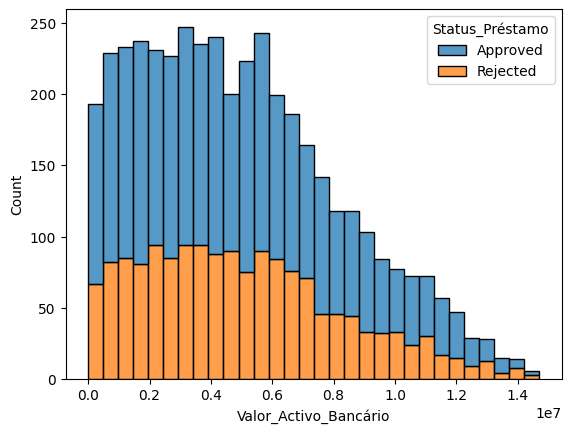

In [65]:
sns.histplot(
    data=df,
    x='Valor_Activo_Bancário',
    hue='Status_Préstamo',    
    multiple='stack',         
    bins=30,
    kde=False
)

## Comprobrar valores negativos

In [66]:
print(df.loc[df["N_Dependientes"] < 0 ])
print(df.loc[df["Ingresos_Anuales"] < 0 ])
print(df.loc[df["Valor_Préstamo"] < 0 ])
print(df.loc[df["Plazo_Préstamo"] < 0 ])
print(df.loc[df["Pontuación_Crédito"] < 0 ])
print(df.loc[df["Valor_Activos_Residenciales"] < 0 ])   #valores negativos
print(df.loc[df["Valor_Activos_Comerciales"] < 0 ])
print(df.loc[df["Valor_Activos_Lujo"] < 0 ])
print(df.loc[df["Valor_Activo_Bancário"] < 0 ])


Empty DataFrame
Columns: [ID, N_Dependientes, Educación, Trabajador_Autonomo, Ingresos_Anuales, Valor_Préstamo, Plazo_Préstamo, Pontuación_Crédito, Valor_Activos_Residenciales, Valor_Activos_Comerciales, Valor_Activos_Lujo, Valor_Activo_Bancário, Status_Préstamo]
Index: []
Empty DataFrame
Columns: [ID, N_Dependientes, Educación, Trabajador_Autonomo, Ingresos_Anuales, Valor_Préstamo, Plazo_Préstamo, Pontuación_Crédito, Valor_Activos_Residenciales, Valor_Activos_Comerciales, Valor_Activos_Lujo, Valor_Activo_Bancário, Status_Préstamo]
Index: []
Empty DataFrame
Columns: [ID, N_Dependientes, Educación, Trabajador_Autonomo, Ingresos_Anuales, Valor_Préstamo, Plazo_Préstamo, Pontuación_Crédito, Valor_Activos_Residenciales, Valor_Activos_Comerciales, Valor_Activos_Lujo, Valor_Activo_Bancário, Status_Préstamo]
Index: []
Empty DataFrame
Columns: [ID, N_Dependientes, Educación, Trabajador_Autonomo, Ingresos_Anuales, Valor_Préstamo, Plazo_Préstamo, Pontuación_Crédito, Valor_Activos_Residenciales, V

## Quitar lineas con valores negativos 

In [67]:
df["Valor_Activos_Residenciales"].sort_values()

1806     -100000
559      -100000
1163     -100000
3019     -100000
4130     -100000
          ...   
1965    28400000
2318    28500000
1591    28500000
905     28700000
3119    29100000
Name: Valor_Activos_Residenciales, Length: 4269, dtype: int64

### 28 valores negativos

In [68]:
#Cantidad de valores menor que 0
print(df.loc[df["Valor_Activos_Residenciales"] < 0 ].any(axis=1).sum())

28


In [69]:
#función drop para quitar las lineas
df = df.drop(df[df["Valor_Activos_Residenciales"] < 0].index)

#### Quitando las 28 lineas

In [70]:
#comprobar que las lines fueran quitadas
print(df.loc[df["Valor_Activos_Residenciales"] < 0].any(axis=1).sum())

0


### En Valor_Activos_Residenciales, vamos cambiar el valor 0 por la mediana de la columna

In [71]:
#Cantidad de valores igual que 0
print(df.loc[df["Valor_Activos_Residenciales"] == 0 ].any(axis=1).sum())

45


In [72]:
#obtener la mediana
median = df["Valor_Activos_Residenciales"].median()

In [73]:
df.loc[df["Valor_Activos_Residenciales"] == 0, "Valor_Activos_Residenciales"] = median

In [74]:
#Cantidad de valores igual que 0
print(df.loc[df["Valor_Activos_Residenciales"] == 0].any(axis=1).sum())

0


# Dividir los datos en predictores y clases
### x_prestamo
### y_prestamo

In [75]:
# Crear dataset predictores
x_prestamo = df.iloc[:,1:12]

#### convertir a numpy

In [76]:
x_prestamo = x_prestamo.values
print(x_prestamo)

[[2 'Graduate' 'No' ... 17600000 22700000 8000000]
 [0 'Not Graduate' 'Yes' ... 2200000 8800000 3300000]
 [3 'Graduate' 'No' ... 4500000 33300000 12800000]
 ...
 [2 'Not Graduate' 'No' ... 12400000 18100000 7300000]
 [1 'Not Graduate' 'No' ... 700000 14100000 5800000]
 [1 'Graduate' 'No' ... 11800000 35700000 12000000]]


In [77]:
#Crear dataset clase
y_prestamo = df.iloc[:,-1]

#### convertir a numpy

In [78]:
y_prestamo = y_prestamo.values
y_prestamo

array(['Approved', 'Rejected', 'Rejected', ..., 'Rejected', 'Approved',
       'Approved'], shape=(4241,), dtype=object)

In [79]:
x_prestamo.shape

(4241, 11)

## One Hot Encoder
### Cada categoría se trata de forma independiente

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [81]:
one_hot_encoder_prestamo = ColumnTransformer(transformers=[("OneHot",OneHotEncoder(),[1,2])],remainder="passthrough")

In [82]:
x_prestamo = one_hot_encoder_prestamo.fit_transform(x_prestamo)

In [83]:
x_prestamo.shape

(4241, 13)

In [84]:
x_prestamo[3]

array([1.0, 0.0, 1.0, 0.0, 3, 8200000, 30700000, 8, 467, 18200000,
       3300000, 23300000, 7900000], dtype=object)

## Salvar Modelo One Hot Encoder

In [85]:
with open("one_hot_encoder.pkl", "wb") as f:
    pickle.dump(one_hot_encoder_prestamo, f)

# Estandarización de conjuntos de datos 

In [86]:
from sklearn.preprocessing import StandardScaler


In [87]:
scaler_prestamo = StandardScaler()
x_prestamo = scaler_prestamo.fit_transform(x_prestamo)

In [88]:
x_prestamo[0]

array([ 0.99693937, -0.99693937,  1.00686155, -1.00686155, -0.2937337 ,
        1.61470382,  1.62968072,  0.19232546,  1.03516445, -0.80344422,
        2.87290346,  0.82791784,  0.9259495 ])

## Salvar Modelo Scaler

In [89]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler_prestamo, f)

# modelo de entrenamiento y prueba divididos
#### split train test

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_prestamo_entrenamiento, X_prestamo_prueba, y_prestamo_entrenamiento, y_prestamo_prueba = train_test_split(x_prestamo, y_prestamo,
                                                                                                            test_size=0.30,random_state=0)

In [92]:
X_prestamo_entrenamiento.shape

(2968, 13)

In [93]:
X_prestamo_prueba[-1]

array([ 0.99693937, -0.99693937, -0.99318521,  0.99318521,  1.4757615 ,
       -0.20488231, -0.39612896,  1.59378982, -1.70492755, -0.43141426,
       -0.70260336, -0.35972482,  0.21806343])

In [94]:
y_prestamo_entrenamiento.shape

(2968,)

In [95]:
y_prestamo_prueba.shape

(1273,)

# Salvar las Variables

In [96]:
import pickle

In [97]:
with open("prestamo.pkl", mode="wb") as f:
    pickle.dump([X_prestamo_entrenamiento,y_prestamo_entrenamiento,X_prestamo_prueba,y_prestamo_prueba],f)